In [2]:
from keras.layers import Conv2D, MaxPooling2D, Flatten,Dense
from keras.models import Sequential
from keras.datasets import mnist
from keras.utils import to_categorical

import matplotlib.pyplot as plt
%matplotlib inline
#To show plot in this notebook.

In [3]:
#pip install keras
#pip install tensorflow

(X_train, y_train), (X_test, y_test) = mnist.load_data() #All images are stored in Train and lebel of that images are in test
#Returned tuple of numpy array

In [4]:
print(X_train.shape) # will show 60,000 entries and 28X28 dimension images
print(y_train.shape) # this contains the lebel of each images (eg - pic = 5)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [5]:
X_train[0].shape

(28, 28)

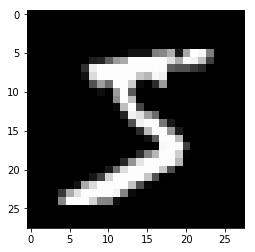

In [24]:
plt.imshow(X_train[0],cmap='gray')

# Pre-processing
The nmist dataset only has a depth of 1, but we must explicitly declare that

In [15]:
num_classes =10
epochs = 3


In [25]:
#X_train=X_train.reshape(60000,28,28)
X_train=X_train.reshape(60000,28,28,1)

In [20]:
X_train.shape

(60000, 28, 28, 1)

In [22]:
X_train[0].shape

(28, 28, 1)

In [26]:
X_test=X_test.reshape(10000,28,28,1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0
y_train = to_categorical(y_train,num_classes)
y_test = to_categorical(y_test,num_classes)

In [29]:
#plt.imshow(y_train[0],cmap='gray') [this code will show error because of dimentionality change]

In [33]:
y_train.shape

(60000, 10)

In [34]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)
(60000, 10)
(10000, 10)


Cov_net model
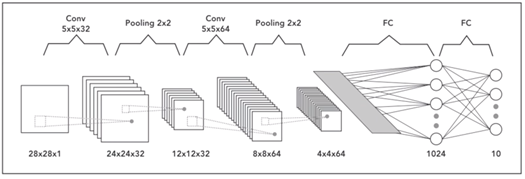

If we see the above image, that we're trying to create looks like. We have our original image which is 28 by 28 with one channel so it's a grayscale image. We then do the convolution operation with the five by five kernel and then there are 32 filters. We then do a pooling so our image drops from 24 by 24 to 12 by 12. We then do another convolution operation with the five by five kernel and this time with 64 filters.

We do another pooling. Again, we see a reduction in our image by half. That's from eight by eight to four by four. Finally, there's a flattening so there's a fully connected network. Then we've got the output. We've got all of the 1,024 notes terminating in the ten outputs. The ten outputs correspond to the ten digits, zero to nine. 

Summary of activity:
Here the input is 28X28X1, hence we are working with gray scale image thus the number of channel is 1. For color image that should be 3(RGB)
-	The input data goes 2 convolution layers that have a kernel size of five. 
-	First convolution has 32 output feature maps 
-	Second one has 64 output feature maps
-	Each convolution is follower by a sub-sampling using pooling (Max or average)
-	After each pooling dimensions reduced by half. So it goes 24 by 24 to 12 by 12 and 8 by 8 to 4 by 4
-	A fully connected layer passes the output to a second fully connected layer which act as final softmax output layer.
-	There are 10 output in the final layer so final layer will decide which digit has recognized


# Create and Compile the model

In [35]:
cov_n=Sequential()

In [36]:
#we could use padding as 'valid', kernel_size is filter size we could also use 3X3
cov_n.add(Conv2D(32,kernel_size=(5,5), input_shape=(28,28,1),padding='same',activation='relu')) 

In [37]:
cov_n.add(MaxPooling2D())

In [38]:
cov_n.add(Conv2D(64,kernel_size=(5,5),padding='same',activation='relu'))

In [40]:
cov_n.add(MaxPooling2D())

In [41]:
#We need to flatten the network because, coming next we would have a dense/fully connected network.
cov_n.add(Flatten()) 

In [42]:
cov_n.add(Dense(1024,activation='relu'))

In [43]:
cov_n.add(Dense(10,activation='softmax'))

In [44]:
cov_n.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [45]:
print(cov_n.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        51264     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              3212288   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                10250     
Total para

# Train the model

In [48]:
#cov_n.load_weights('')
hist_cnn=cov_n.fit(X_train,y_train, epochs=5,verbose=1,validation_data=(X_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 1587s 26ms/step - loss: 0.0987 - acc: 0.9698 - val_loss: 0.0507 - val_acc: 0.9831
Epoch 2/5
60000/60000 [==============================] - 1545s 26ms/step - loss: 0.0356 - acc: 0.9894 - val_loss: 0.0444 - val_acc: 0.9849
Epoch 3/5
60000/60000 [==============================] - 1559s 26ms/step - loss: 0.0235 - acc: 0.9922 - val_loss: 0.0377 - val_acc: 0.9901
Epoch 4/5
60000/60000 [==============================] - 1559s 26ms/step - loss: 0.0188 - acc: 0.9940 - val_loss: 0.0247 - val_acc: 0.9926
Epoch 5/5
60000/60000 [==============================] - 1592s 27ms/step - loss: 0.0137 - acc: 0.9956 - val_loss: 0.0349 - val_acc: 0.9908


# Plot the accuracy of the model

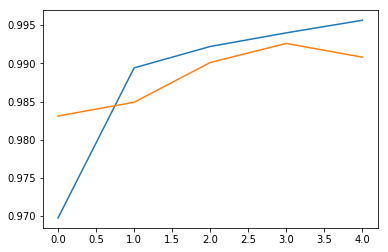

In [49]:
plt.plot(hist_cnn.history['acc'])
plt.plot(hist_cnn.history['val_acc'])

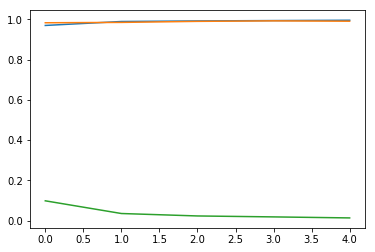

In [51]:
plt.plot(hist_cnn.history['acc'])
plt.plot(hist_cnn.history['val_acc'])
plt.plot(hist_cnn.history['loss'])

# Evaluating the Model

In [53]:
score1 = cov_n.evaluate(X_test,y_test)

10000/10000 [==============================] - 7s 663us/step


In [54]:
score1

[0.034940183609395305, 0.9908]

In [55]:
from keras.models import model_from_json
import numpy
import os
# fix random seed for reproducibility
#numpy.random.seed(7)

In [56]:
# evaluate the model
scores = cov_n.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (cov_n.metrics_names[1], scores[1]*100))


acc: 99.08%


In [57]:
# serialize model to JSON
model_json1 = cov_n.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json1)


In [58]:
# serialize weights to HDF5
# A H5 file called "model_covn" will be generated at source location. 
cov_n.save_weights("model_covn.h5")
print("Saved model to disk")

Saved model to disk


In [59]:
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

In [60]:
# load weights into new model
loaded_model.load_weights("model_covn.h5")
print("Loaded model from disk")


Loaded model from disk


In [61]:
# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [62]:
score = loaded_model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

acc: 99.08%


In [63]:
# evaluate loaded model on test data with changed loss and optimizer value
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])


In [64]:
score = loaded_model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

acc: 99.82%
